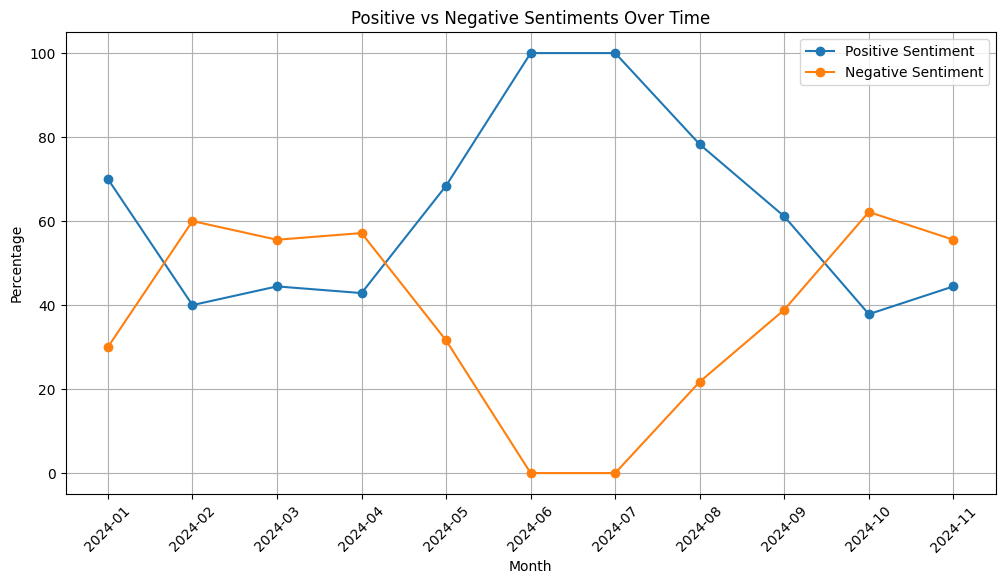

In [ ]:
#visualization of a line chart
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tiktok_sentiment.csv")

# Convert timestamp column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month for grouping
df['month'] = df['date'].dt.to_period('M')

# Count the number of positive and negative sentiments per month
monthly_counts = df.groupby(['month', 'predicted_sentiment']).size().unstack(fill_value=0)

# Calculate percentages
monthly_counts['Total'] = monthly_counts.sum(axis=1)
monthly_counts['Positive %'] = (monthly_counts.get('positive', 0) / monthly_counts['Total']) * 100
monthly_counts['Negative %'] = (monthly_counts.get('negative', 0) / monthly_counts['Total']) * 100

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts['Positive %'], marker='o', label="Positive Sentiment", linestyle="-")
plt.plot(monthly_counts.index.astype(str), monthly_counts['Negative %'], marker='o', label="Negative Sentiment", linestyle="-")

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.title("Positive vs Negative Sentiments Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

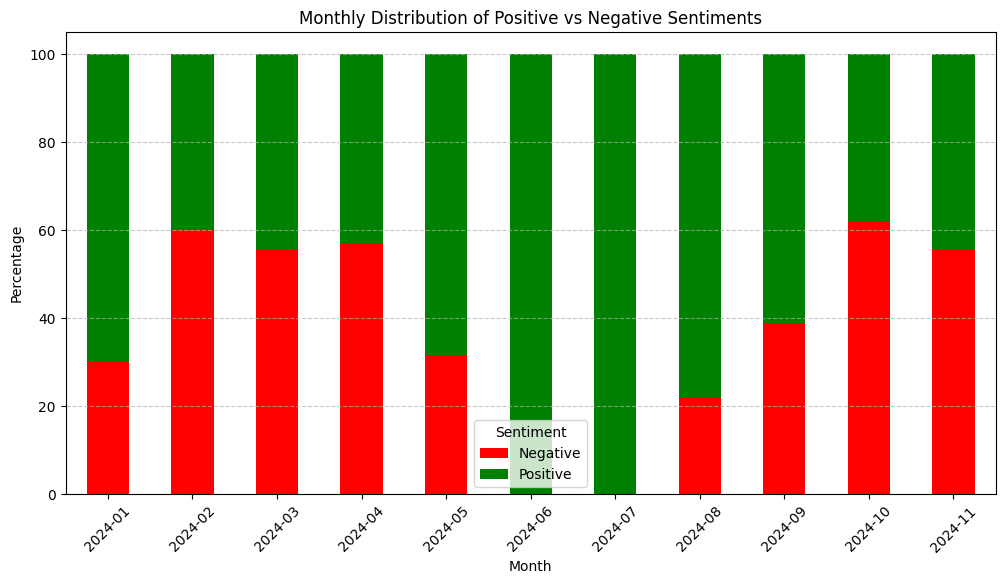

In [ ]:
#stacked bar chart graph
# Count the number of positive and negative sentiments per month
monthly_counts = df.groupby(['month', 'predicted_sentiment']).size().unstack(fill_value=0)

# Normalize counts to get percentages
monthly_counts_percentage = monthly_counts.div(monthly_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
monthly_counts_percentage.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(12, 6))

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.title("Monthly Distribution of Positive vs Negative Sentiments")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


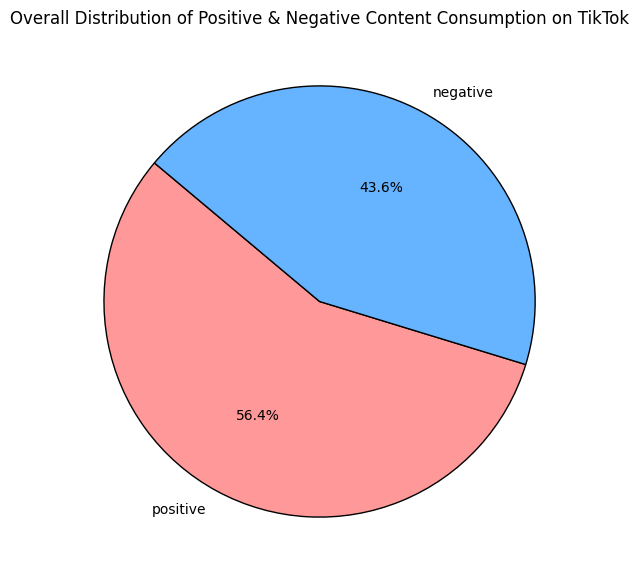

In [ ]:
#overall hashtag classification pie chart graph
# Ensure the sentiment column exists
if 'predicted_sentiment' not in df.columns:
    raise ValueError("The CSV file must contain a 'sentiment' column.")

# Count the occurrences of each sentiment
sentiment_counts = df['predicted_sentiment'].value_counts()

# Define labels and colors
labels = sentiment_counts.index
colors = ['#ff9999','#66b3ff']  # Custom colors (Negative = red, Positive = blue)

# Create a pie chart
plt.figure(figsize=(7,7))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Overall Distribution of Positive & Negative Content Consumption on TikTok")
plt.show()
